# Taller Machine Learning

# Parte 1: Clasificación supervisada

1. Carga el dataset Iris. 
2. Divide los datos en conjunto de entrenamiento (70%) y 
prueba (30%). 
3. Entrena y evalúa estos modelos para predecir la 
especie de iris: 
a. Árbol de decisión 
b. Random Forest (100 árboles) 
c. SVM con kernel RBF 
4. Calcula y muestra la precisión de cada modelo en el 
conjunto de prueba. 
5. Visualiza el árbol de decisión entrenado.

Precision del arbol de decision: 1.00
Precision del Random Forest: 1.00
Precision del SVC: 1.00


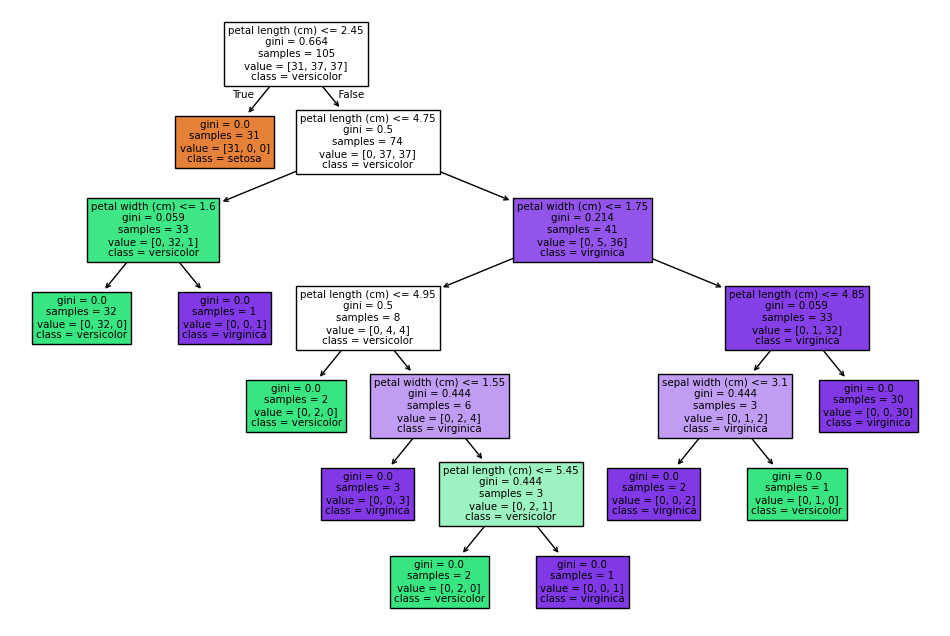

In [1]:
# importar las librerias
 
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# 1. Cargar Base de datos
iris = (
    load_iris()
)  
x = iris.data  # Guarda las características de las flores
y = iris.target  # Guarda el tipo de flor 




# 2. Dividir datos en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(
    x, y, test_size=0.3, random_state=42
)  


#3 y 4
# 3.A. Crear modelo de árbol de decisión
clas = DecisionTreeClassifier(
    random_state=42
)  # Crea un clasificador de árbol de decisión vacio
clas.fit(
    x_train, y_train
) 
# Crea y entrena el árbol usando los datos de entrenamiento
# Predecir con datos de prueba
y_pred = clas.predict(x_test)  
# Evaluar exactitud
accuracy = (y_pred == y_test).mean()
print(f"Precision del arbol de decision: {accuracy:.2f}")




#3.B. Random Forest
# Importa RandomForestClassifier
from sklearn.ensemble import (
    RandomForestClassifier,
)  
#Crear Random Forest con 100 arboles
randomf = RandomForestClassifier(
    n_estimators=100, random_state=42
)  
#Entrenar Random Forest con los datos de entrenamiento
randomf.fit(x_train, y_train)
#Predecir qué tipo de flor es cada una en el grupo de prueba.
y_pred_randomf = randomf.predict(
    x_test
)  
#Evaluar exactitud
accuracy_randomf = (y_pred_randomf == y_test).mean()
print(f"Precision del Random Forest: {accuracy_randomf:.2f}")




# 3.C. SVM
# Importa el clasificador SVC y Numpy
from sklearn.svm import (
    SVC,
)  
import numpy as np
# Selecciona solo las flores de tipo 0 y 1 (excluye el tipo 2)
idx = np.where(y != 2)  
x_binary = x[idx]
y_binary = y[idx]

 # Divide los datos binarios en entrenamiento y prueba
x_train, x_test, y_train, y_test = train_test_split(
    x_binary, y_binary, test_size=0.3, random_state=42
) 

#Crear el modelo SVC
svm_clas = SVC(kernel="rbf")
svm_clas.fit(
    x_train, y_train
)  
# Entrena el clasificador SVC con los datos de entrenamiento
#Predecir
y_pred_svm = svm_clas.predict(x_test)
#Evaluar exactitud
accuracy_svm = (y_pred_svm == y_test).mean()
print(f"Precision del SVC: {accuracy_svm:.2f}")

# 5. Visualizar el arbol
plt.figure(figsize=(12, 8))
plot_tree(
    clas, feature_names=iris.feature_names, class_names=iris.target_names, filled=True
)
plt.show()



# Parte 2: Clustering no supervisado

1. Usa solo las dos primeras características para facilitar 
visualización. (arriba)
2. Aplica K-Means para encontrar 3 clusters. Visualiza los 
clusters y sus centroides. 
3. Aplica DBSCAN con eps=0.5 y min_samples=5. 
Visualiza los clusters y los puntos etiquetados como 
ruido. 
4. Compara los clusters encontrados con las etiquetas 
reales. 

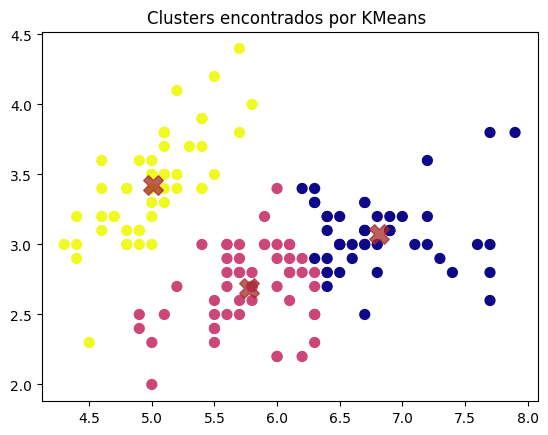

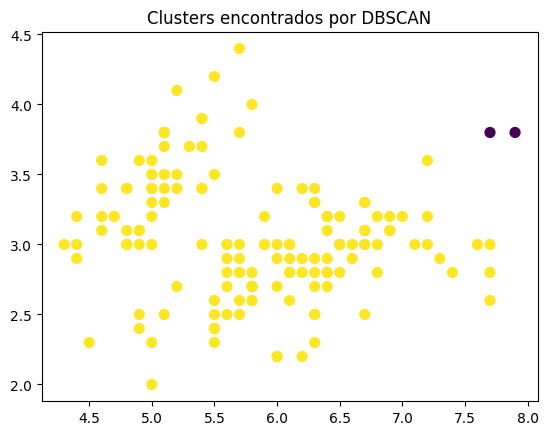

ARI K-Means (2 características) vs. etiquetas reales: 0.60
ARI DBSCAN (2 características) vs. etiquetas reales: 0.00


In [ ]:

#Importar librerias
from sklearn.cluster import KMeans  
from sklearn.datasets import make_blobs   
import matplotlib.pyplot as plt 
from sklearn.cluster import DBSCAN
import numpy as np
from sklearn.metrics import accuracy_score, adjusted_rand_score
#1
#Usar 2 primeras carácteristicas
xx = x[:, :2]
y = iris.target

#2
#K- Means
kmeans = KMeans(n_clusters=3, random_state=42)
clusters_km = kmeans.fit_predict(xx)

#obtener las etiquetas de los clusters
etiquetas = kmeans.labels_  # obtener las etiquetas de los clusters asignados por KMeans
centroids = kmeans.cluster_centers_  # obtener las coordenadas de los centroides de los clusters
# graficar los datos y los centroides
plt.scatter(xx[:, 0], xx[:, 1], c=etiquetas, s=50, cmap='plasma') 
plt.scatter(centroids[:, 0], centroids[:, 1], c='brown', s=200, alpha=0.75, marker='X')  
plt.title('Clusters encontrados por KMeans ')  
plt.show()

#3
#DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=5)
clusters_db = dbscan.fit_predict(xx)
#visualizar resultados
plt.scatter (xx[:,0], xx [:,1], c=clusters_db, cmap= "viridis", s=50)
plt.title ("Clusters encontrados por DBSCAN")
plt.show()

#4
#Comparar clusters encontrados con etiquetas reales
ari_km = adjusted_rand_score(y, clusters_km)
ari_db = adjusted_rand_score(y, clusters_db)
print(f"ARI K-Means (2 características) vs. etiquetas reales: {ari_km:.2f}")
print(f"ARI DBSCAN (2 características) vs. etiquetas reales: {ari_db:.2f}")


# Preguntas

- ¿Cuál modelo supervisado tuvo mejor precisión? ¿Por qué? 
Random Forest suele ser el mejor en precisión porque puede generalizar al combinar muchos árboles, pero en este ejercicio todos tuvieron una precisión del 100%.
- ¿Cómo se relacionan los clusters de K-Means con las clases reales? 
K-Means agrupa datos sin usar etiquetas reales, pero en datasets como Iris, los clusters pueden coincidir en gran medida con las clases reales. Aunque los números de clusters no coinciden con las clases reales, la forma de agrupar puede reflejar la estructura subyacente de las clases
- ¿Qué utilidad tiene DBSCAN en comparación con KMeans? 
DBSCAN es útil cuando los clústeres tienen formas irregulares o cuando hay ruido, mientras que KMeans funciona mejor con clústeres de forma circular y de tamaño similar.
- ¿Qué ventajas y desventajas tiene un árbol de decisión frente a un Random Forest? 
 Un solo árbol es útil cuando se necesita interpretabilidad, ya que es simple, rápido de entrenar e interpretable; pero Random Forest es más fiable para predicción, ya que tiene mayor precisión y es robusto ante el ruido y la variabilidad.
- ¿Cómo ayuda la visualización del árbol para interpretar el modelo?
La visualización facilita la explicación del modelo a usuarios no técnicos y permite auditoría y confianza en decisiones críticas.